In [14]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=43176496f8ee53dcb43014429ba66ac2de9b91cc90b65344d877cd146a27962f
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [15]:
#basic imports
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [16]:
uploaded = files.upload()

Saving Genre.arff to Genre (1).arff


In [17]:
with open('Genre.arff', 'wb') as f:
    f.write(uploaded['Genre.arff'])

# Load the arff file using scipy
data = arff.loadarff('Genre.arff')
df = pd.DataFrame(data[0])
df.head()

,highlevel_danceability_value,highlevel_equalization_profile_value,highlevel_excitement_value,highlevel_intensity_value,highlevel_speech_music_value,highlevel_voice_instrumental_value,loudness_dynamic_complexity_dvar,loudness_dynamic_complexity_mean,loudness_dynamic_complexity_var,loudness_larm_dvar,...,tonal_chords_strength_dvar,tonal_chords_strength_mean,tonal_chords_strength_var,tonal_dissonance_dvar,tonal_dissonance_mean,tonal_dissonance_var,tonal_key_mode_value,tonal_key_strength_value,tonal_tuning_equal_tempered_deviation_value,genre
0,0.206472,0.372766,0.029087,0.093526,b'music',b'voice',-0.411385,0.024215,-0.201421,-0.532833,...,-0.255337,1.140774,-1.490395,0.494393,0.149725,-0.013634,b'minor',0.526779,-0.205793,b'blu'
1,-0.368479,0.372766,1.341977,0.093526,b'music',b'voice',-0.349921,-0.015672,-0.173045,-0.452769,...,-0.121114,0.497749,-0.901662,0.347729,-0.517640,0.184709,b'major',-0.129683,-0.667979,b'blu'
2,-0.631747,0.372766,-1.283803,-1.324366,b'speech',b'instrumental',4.235612,5.779127,3.973258,1.713613,...,-0.190639,1.408974,-0.502029,1.174496,-1.454160,2.144489,b'major',-1.022781,0.937795,b'blu'
3,-0.190116,0.372766,1.341977,0.093526,b'music',b'voice',-0.307576,0.068818,-0.216986,-0.519222,...,0.257633,0.622749,1.399033,0.791524,-0.601227,0.873673,b'major',0.074454,-0.406373,b'blu'
4,0.588278,0.372766,1.341977,0.802473,b'music',b'instrumental',-0.332032,-1.078238,0.350680,-0.765884,...,-0.309481,1.301291,-0.708195,-0.093155,0.287901,-0.644858,b'major',0.919307,-0.917709,b'blu'


In [18]:
print("Shape of the DataFrame: ", df.shape)

Shape of the DataFrame:  (800, 241)


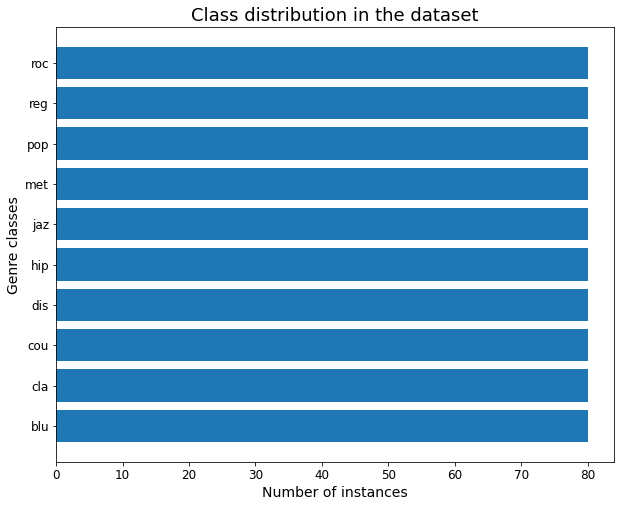

In [19]:
# Get the genre classes and their counts
genre_classes, genre_counts = np.unique(df['genre'], return_counts=True)

# Sort the genre classes and counts in ascending order
sorted_indices = np.argsort(genre_counts)
genre_classes = genre_classes[sorted_indices]
genre_counts = genre_counts[sorted_indices]

# Plot the instances per genre class using a horizontal bar chart
plt.figure(figsize=(10,8))
plt.barh(genre_classes, genre_counts, align='center')
plt.title('Class distribution in the dataset', fontsize=18)
plt.xlabel('Number of instances', fontsize=14)
plt.ylabel('Genre classes', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [20]:
# Define the index_categorical_columns function with a more descriptive name
def find_categorical_columns(data):
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    return categorical_cols

# Call the find_categorical_columns function with the DataFrame
categorical_cols = find_categorical_columns(df)
print("Categorical columns:", categorical_cols)

Categorical columns: ['highlevel_speech_music_value', 'highlevel_voice_instrumental_value', 'tonal_key_mode_value', 'genre']


In [21]:
# Access the 'genre' column values using the numpy array
genres = data[0]['genre']

# Convert the byte strings to regular strings using a list comprehension
genres = [g.decode('utf-8') for g in genres]

# Use pandas to create a series and print the unique values of the 'genre' column
genre_series = pd.Series(genres)
print("Unique genres:", genre_series.unique())

Unique genres: ['blu' 'cla' 'cou' 'dis' 'hip' 'jaz' 'met' 'pop' 'reg' 'roc']


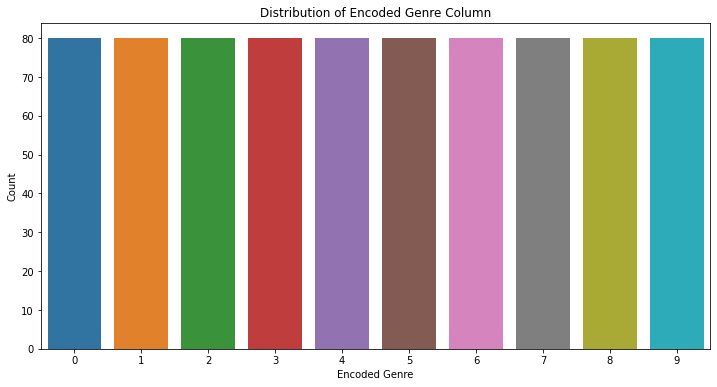

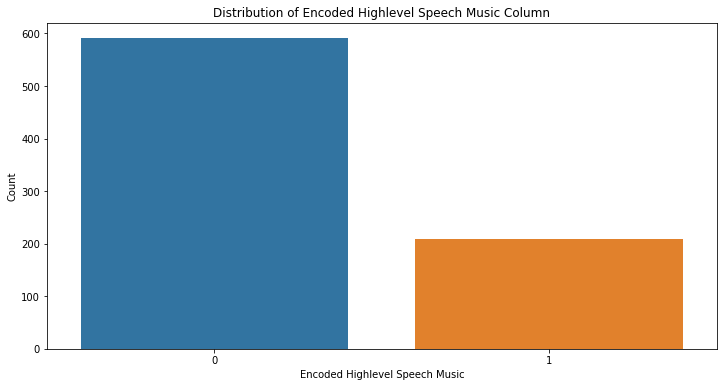

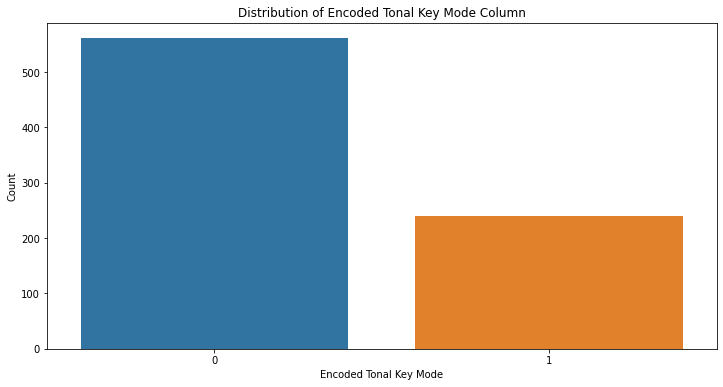

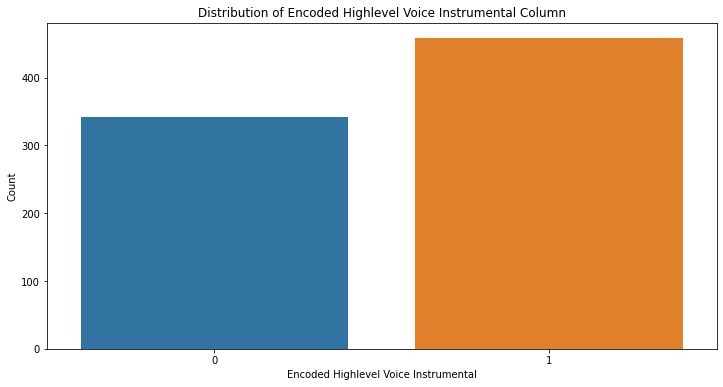

   highlevel_danceability_value  highlevel_equalization_profile_value  \
0                      0.206472                              0.372766   
1                     -0.368479                              0.372766   
2                     -0.631747                              0.372766   
3                     -0.190116                              0.372766   
4                      0.588278                              0.372766   

   highlevel_excitement_value  highlevel_intensity_value  \
0                    0.029087                   0.093526   
1                    1.341977                   0.093526   
2                   -1.283803                  -1.324366   
3                    1.341977                   0.093526   
4                    1.341977                   0.802473   

   highlevel_speech_music_value  highlevel_voice_instrumental_value  \
0                             0                                   1   
1                             0                           

In [22]:
import seaborn as sns

# Convert the categorical columns to numerical using LabelEncoder
labelencoder_genre = LabelEncoder()
df['genre'] = labelencoder_genre.fit_transform(df['genre'])

labelencoder_speech = LabelEncoder()
df['highlevel_speech_music_value'] = labelencoder_speech.fit_transform(df['highlevel_speech_music_value'])

labelencoder_tonal_key = LabelEncoder()
df['tonal_key_mode_value'] = labelencoder_tonal_key.fit_transform(df['tonal_key_mode_value'])

labelencoder_voice = LabelEncoder()
df['highlevel_voice_instrumental_value'] = labelencoder_voice.fit_transform(df['highlevel_voice_instrumental_value'])

# Visualize the distribution of the encoded categorical columns using a countplot
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='genre')
plt.title('Distribution of Encoded Genre Column')
plt.xlabel('Encoded Genre')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='highlevel_speech_music_value')
plt.title('Distribution of Encoded Highlevel Speech Music Column')
plt.xlabel('Encoded Highlevel Speech Music')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='tonal_key_mode_value')
plt.title('Distribution of Encoded Tonal Key Mode Column')
plt.xlabel('Encoded Tonal Key Mode')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='highlevel_voice_instrumental_value')
plt.title('Distribution of Encoded Highlevel Voice Instrumental Column')
plt.xlabel('Encoded Highlevel Voice Instrumental')
plt.ylabel('Count')
plt.show()

# Print the head of the DataFrame to verify the encoding
print(df.head())

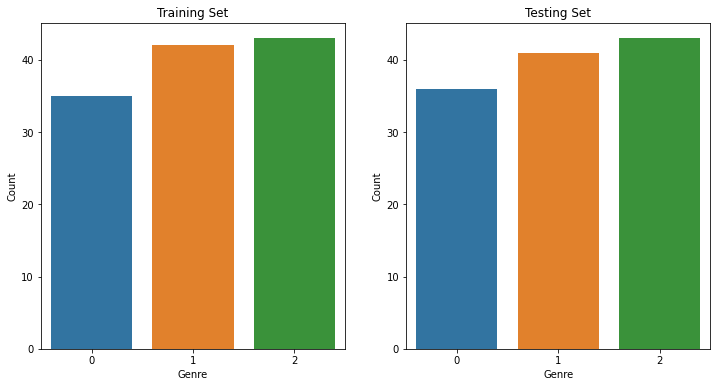

In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Get the target variable
Genres = df['genre'].values

# Convert the remaining columns (except the last column, which is the target) to a numpy array
X = df.iloc[:, :-1].values

# Randomly subset the data to reduce the number of features
subset_indices = np.random.choice(X.shape[1], size=min(X.shape[1], len(Genres)), replace=True)
Y_subset = Genres[subset_indices]
X_subset = X[:, subset_indices]

# Transpose X if necessary
if X_subset.shape[0] > X_subset.shape[1]:
    X_subset = X_subset.T

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_subset, Y_subset, test_size=0.5, random_state=0, stratify=Y_subset)

# Visualize the distribution of the target variable in the training and testing sets
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.countplot(x=Y_train, ax=ax[0])
sns.countplot(x=Y_test, ax=ax[1])
ax[0].set_title('Training Set')
ax[1].set_title('Testing Set')
ax[0].set_xlabel('Genre')
ax[1].set_xlabel('Genre')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
plt.show()

# Feature Selection

Fitting estimator with 800 features.
Fitting estimator with 799 features.
Fitting estimator with 798 features.
Fitting estimator with 797 features.
Fitting estimator with 796 features.
Fitting estimator with 795 features.
Fitting estimator with 794 features.
Fitting estimator with 793 features.
Fitting estimator with 792 features.
Fitting estimator with 791 features.
Fitting estimator with 790 features.
Fitting estimator with 789 features.
Fitting estimator with 788 features.
Fitting estimator with 787 features.
Fitting estimator with 786 features.
Fitting estimator with 785 features.
Fitting estimator with 784 features.
Fitting estimator with 783 features.
Fitting estimator with 782 features.
Fitting estimator with 781 features.
Fitting estimator with 780 features.
Fitting estimator with 779 features.
Fitting estimator with 778 features.
Fitting estimator with 777 features.
Fitting estimator with 776 features.
Fitting estimator with 775 features.
Fitting estimator with 774 features.
F

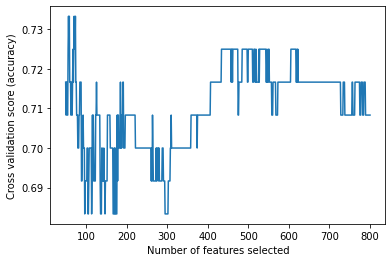

In [24]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# define the logistic regression model
rf = LogisticRegression(max_iter=1500)

# set the minimum number of features to select
min_features_to_select = 50  

# create the RFECV object
rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(4),
              scoring='accuracy',
              min_features_to_select=min_features_to_select, verbose=1)

# fit the RFECV object on the training set
rfecv.fit(X_train, Y_train)

# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

# plot the cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
         rfecv.cv_results_['mean_test_score'])
plt.show()

# get the ranking and indexes of the selected features
ranking = rfecv.ranking_
indexes = np.where(rfecv.support_==True)[0]

# select the important features from the training and testing sets
X_train_selected = X_train[:,indexes]
X_test_selected = X_test[:,indexes]

# scale the selected features using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_selected)
X_train_selected = scaler.transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

In [25]:
X_train, Y_train = data
# Convert X_train to a DataFrame
X_train_df = pd.DataFrame(X_train)

# Get the number of columns in X_train_df
n_columns = X_train_df.shape[1]

# Remove any index values that are larger than the number of columns in X_train_df
indexes = [idx for idx in indexes if idx < n_columns]

# Get the selected data from X_train_df using the updated indexes
selected_data = X_train_df.iloc[:, indexes]

# Display the first few rows of the selected data
display(selected_data.head())

,highlevel_equalization_profile_value,spectral_barkbands_07_dvar,spectral_barkbands_12_mean,spectral_barkbands_24_dvar,spectral_barkbands_24_var,spectral_centroid_mean,spectral_energybandratio_middle_high_var,spectral_flux_dvar,spectral_flux_mean,spectral_kurtosis_dvar,spectral_kurtosis_mean,spectral_mfcc_01_var,spectral_mfcc_03_mean,spectral_mfcc_04_mean,spectral_mfcc_06_var,spectral_mfcc_11_dvar,spectral_mfcc_12_mean,spectral_skewness_var
0,0.372766,-0.120587,-0.526831,-0.222751,-0.23193,-0.404595,-1.054851,-0.157037,0.706007,-0.294702,-0.281401,-0.748637,0.166213,0.670689,-0.838721,-0.263150,-1.356252,-0.345782
1,0.372766,-0.458366,-0.034588,-0.222751,-0.23193,0.440791,1.708217,-0.363962,-0.099297,-0.372879,-0.521540,0.697323,-0.185078,0.804216,0.977849,0.765176,-1.896845,-0.395388
2,0.372766,0.008951,-0.245270,-0.222751,-0.23193,-1.115229,-0.186034,-0.697766,-1.678194,-0.033516,0.317829,1.676484,0.082503,-1.518273,0.145863,0.041326,3.679082,0.320039
3,0.372766,0.618774,0.381096,-0.222751,-0.23193,-0.000069,0.629326,-0.249788,0.142474,-0.324620,-0.413115,0.407086,-1.611932,0.234191,-0.323971,0.115195,0.398053,-0.425729
4,0.372766,-0.191173,-0.801357,-0.222751,-0.23193,0.701470,-0.694300,-0.645129,0.078279,-0.405859,-0.591840,-0.938399,-2.013561,0.235430,-0.404779,0.199372,-0.129184,-0.596407


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Genres, test_size=0.2, random_state=42)

# Define the number of principal components to keep
n_components = 35

# Fit the PCA model on the training data
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)

# Transform the testing data using the fitted PCA model
X_test_pca = pca.transform(X_test)

# Train the model on the transformed training data
model.fit(X_train_pca, y_train)

# Evaluate the model on the transformed testing data
score = model.score(X_test_pca, y_test)
print("Accuracy:", score)

Accuracy: 0.76875


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

# Define the parameter grid to search over
param_grid = {'C': range(1, 10, 1)}

# Create a LogisticRegression object with the desired parameters
model = LogisticRegression(solver='liblinear', max_iter=12000, penalty='l1', tol=1e-5)

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Create a GridSearchCV object with the desired parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=cv, n_jobs=-1, error_score=0)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameter values and the corresponding mean cross-validated score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and best score
print('Best hyperparameters:', best_params)
print('Best score:', best_score)

# Print the complete results
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("%0.6f with %r" % (mean_score, params))


Best hyperparameters: {'C': 2}
Best score: 0.7708333333333334
0.770312 with {'C': 1}
0.770833 with {'C': 2}
0.768750 with {'C': 3}
0.765104 with {'C': 4}
0.762500 with {'C': 5}
0.759375 with {'C': 6}
0.757812 with {'C': 7}
0.756250 with {'C': 8}
0.755208 with {'C': 9}


Best hyperparameters: {'C': 1, 'max_iter': 12000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05}
Accuracy score: 0.765625


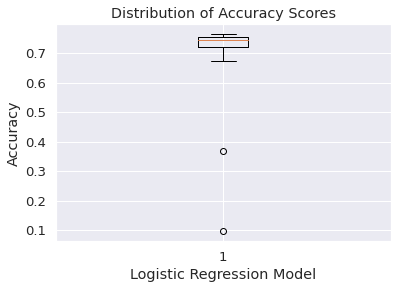

In [59]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import matplotlib.pyplot as plt

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear'],
              'max_iter': [12000],
              'tol': [1e-5]}

# Define the logistic regression model
logreg = LogisticRegression()

# Define the grid search object
grid_search = GridSearchCV(logreg, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)

# Fit the grid search object on the training data
grid_search.fit(X_train_pca, y_train)

# Print the best hyperparameters and corresponding accuracy score
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
print('Accuracy score:', grid_search.best_score_)

# Create the boxplot to visualize the accuracy scores
scores = grid_search.cv_results_['mean_test_score']
fig, ax = plt.subplots()
ax.boxplot(scores)
ax.set_xlabel('Logistic Regression Model')
ax.set_ylabel('Accuracy')
ax.set_title('Distribution of Accuracy Scores')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

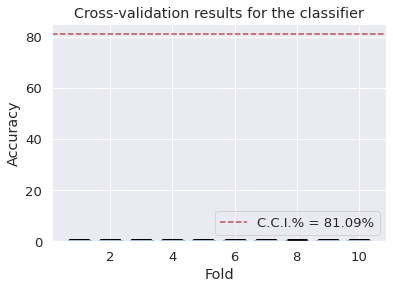

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Define the logistic regression model with the hyperparameters you want to use
clf = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=100)

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Fit the classifier on the training data using 10-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')

# Compute the C.C.I.% metric as the mean of the accuracy scores
cci = scores.mean() * 100

# Create a bar chart of the accuracy scores for each fold and the overall C.C.I.% for the classifier
fig, ax = plt.subplots()
ax.bar(np.arange(1, 11), scores, yerr=np.std(scores), align='center', alpha=0.5, ecolor='black', capsize=10)
ax.axhline(y=cci, color='r', linestyle='--', label='C.C.I.% = {:.2f}%'.format(cci))
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-validation results for the classifier')
ax.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


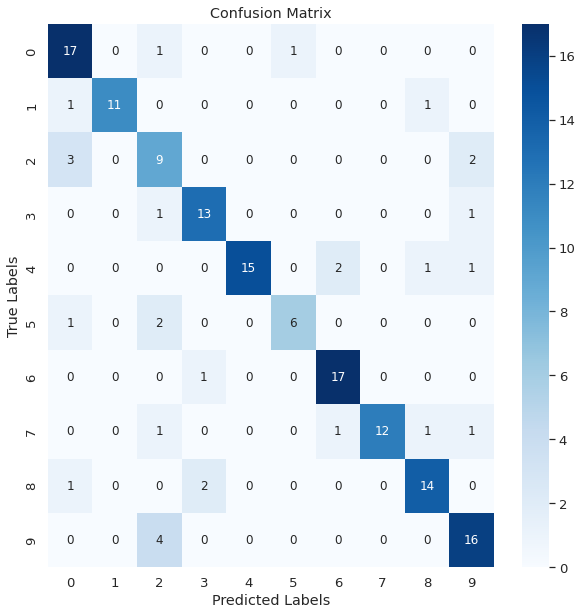

In [68]:
# Fit the logistic regression model on the training data
clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize = (10, 10))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [70]:
# Fit the logistic regression model on the training data
clf.fit(X_train, y_train)

# Get the absolute coefficients of the logistic regression model
coef_abs = abs(clf.coef_)

# Get the indices of the top 5 features
top5_idx = coef_abs.argsort()[0][-5:]

# Get the names of the top 5 features
top5_features = df.columns[top5_idx]

# Print the top 5 features and their coefficients
print("Top 5 features:")
for i, feature in enumerate(top5_features):
    coef = clf.coef_[0][top5_idx[i]]
    print("  {}. {}: {:.3f}".format(i+1, feature, coef))

Top 5 features:
  1. spectral_mfcc_02_mean: 0.536
  2. spectral_energybandratio_low_dvar: 0.545
  3. loudness_vicker_var: -0.548
  4. spectral_barkbands_21_mean: 0.717
  5. loudness_replay_gain_value: -1.084


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


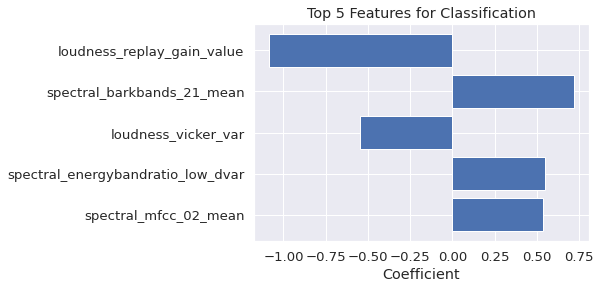

In [72]:
# Fit the logistic regression model on the training data
clf.fit(X_train, y_train)

# Get the absolute coefficients of the logistic regression model
coef_abs = abs(clf.coef_)

# Get the indices of the top 5 features
top5_idx = coef_abs.argsort()[0][-5:]

# Get the names and coefficients of the top 5 features
top5_features = df.columns[top5_idx]
top5_coefs = clf.coef_[0][top5_idx]

# Create a horizontal bar chart of the top 5 features and their coefficients
plt.barh(top5_features, top5_coefs)
plt.xlabel('Coefficient')
plt.title('Top 5 Features for Classification')
plt.show()